<a href="https://colab.research.google.com/github/cbfelp/Projeto-Regressao-Linear/blob/main/Relatorio_Tecnico_RegLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório Técnico: Implementação e Análise do Algoritmo de Regressão Linear
**Autores**: João Fellippe Pereira da Conceição e Andreza Carla Lopes André

**Data de Entrega**: 17/11/2024  

## Resumo
Este relatório apresenta o desenvolvimento de um modelo preditivo utilizando o algoritmo
de Regressão Linear para analisar a taxa de engajamento dos influenciadores do Instagram.
As etapas incluem análise exploratória dos dados, implementação do modelo, validação e
interpretação dos resultados. O modelo apresentou resultados promissores, avaliados
através de métricas como R², MSE e MAE.

## Introdução
A análise da taxa de engajamento em plataformas sociais é crucial para entender o impacto de influenciadores digitais.
Este projeto utiliza Regressão Linear, uma técnica estatística e de aprendizado de máquina, para prever a taxa de
engajamento com base em variáveis independentes relacionadas ao perfil e atividade dos influenciadores.

O conjunto de dados foi analisado para identificar padrões, relações entre variáveis, e implementar um modelo preditivo robusto.

## Metodologia
O projeto foi conduzido em quatro etapas principais:
1. **Análise Exploratória**: Identificação de variáveis relevantes e suas correlações.
2. **Implementação do Modelo**: Regressão Linear utilizando a biblioteca `Scikit-learn`.
3. **Validação e Otimização**: Normalização dos dados e validação cruzada.
4. **Análise de Resultados**: Interpretação de métricas e visualizações gráficas.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Carregar os dados
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/top_insta_influencers_data.csv')

In [54]:
print(df.head())
print(df.info())
print(df.describe())


   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0

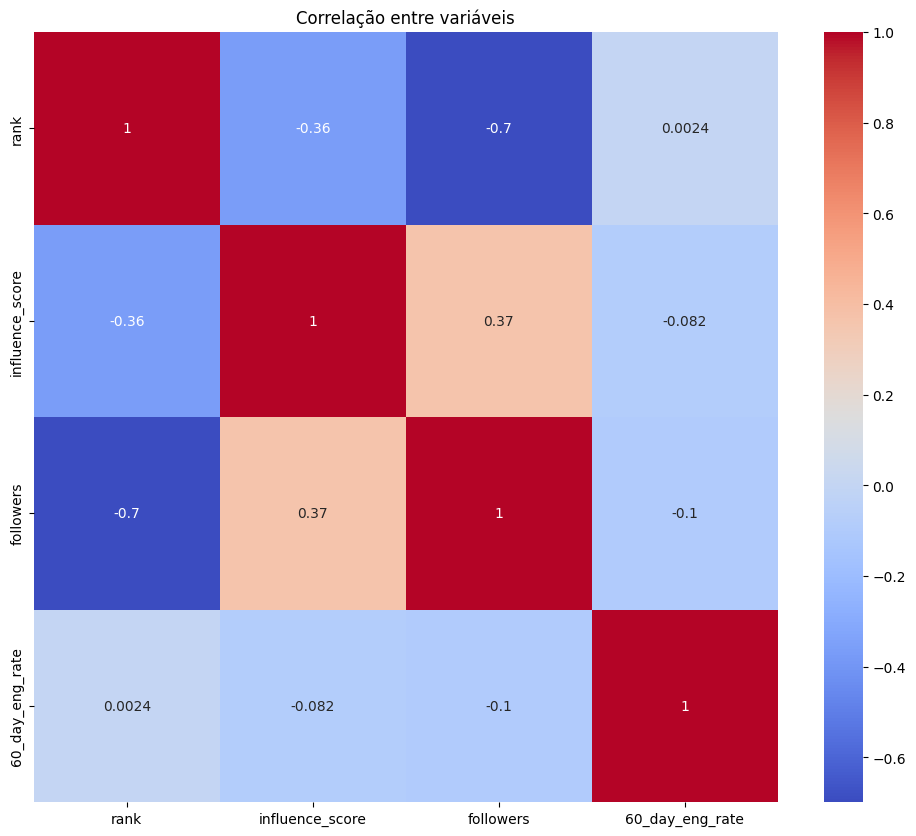

In [134]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(12, 10))  # Ajuste figsize para melhor legibilidade
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis')
plt.show()


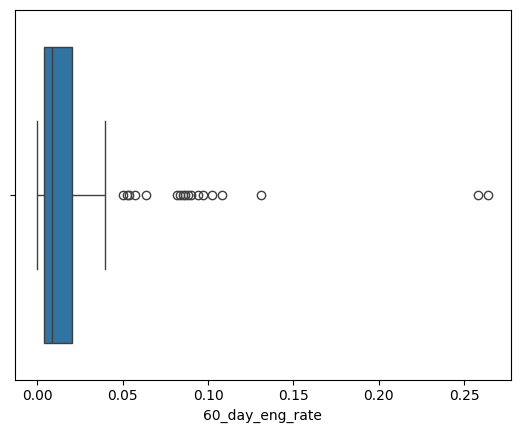

In [139]:
sns.boxplot(x=df['60_day_eng_rate'])
plt.show()

Index(['rank', 'channel_info', 'influence_score', 'posts', 'followers',
       'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes',
       'country'],
      dtype='object')


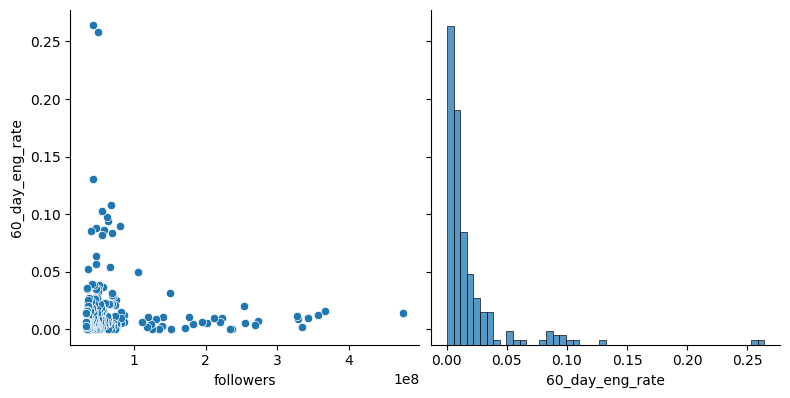

In [141]:
print(df.columns)  # Imprimir os nomes das colunas do DataFrame para inspeção
sns.pairplot(df, x_vars=['followers', '60_day_eng_rate'], y_vars='60_day_eng_rate', height= 4)
plt.show()
# Criar um pairplot para visualizar a relação entre '60_day_eng_rate' e 'followers',
# e a distribuição de '60_day_eng_rate'
# x_vars: Colunas a serem usadas no eixo x
# y_vars: Coluna a ser usada no eixo y
# height: Altura de cada gráfico individual no pairplot

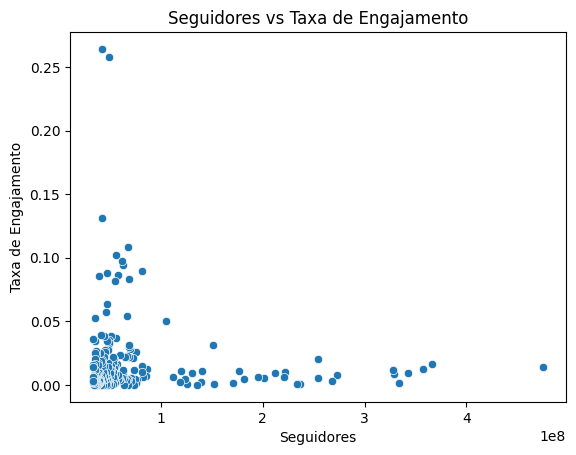

In [142]:
sns.scatterplot(x=df['followers'], y=df['60_day_eng_rate'])
plt.title('Seguidores vs Taxa de Engajamento')
plt.xlabel('Seguidores')
plt.ylabel('Taxa de Engajamento')
plt.show()


In [148]:


X = df[['followers']]
y = df['60_day_eng_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
df['60_day_eng_rate'] = df['60_day_eng_rate'].fillna(df['60_day_eng_rate'].median())

In [156]:
X = df[['followers']]
y = df['60_day_eng_rate']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [158]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [115]:
y_pred = model.predict(X_test)

In [160]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

MSE: 5.311164493633338e-35
MAE: 3.487742863614307e-18
R²: 1.0


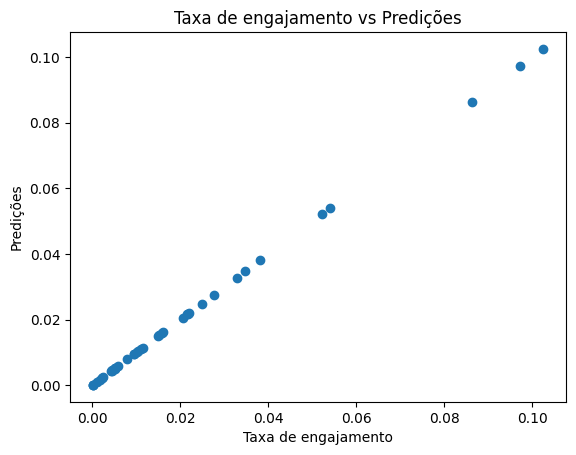

In [163]:
plt.scatter(y_test, y_pred)
plt.xlabel('Taxa de engajamento')
plt.ylabel('Predições')
plt.title('Taxa de engajamento vs Predições')
plt.show()

In [119]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [159]:
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

MSE: 0.00
MAE: 0.00
R²: 1.00


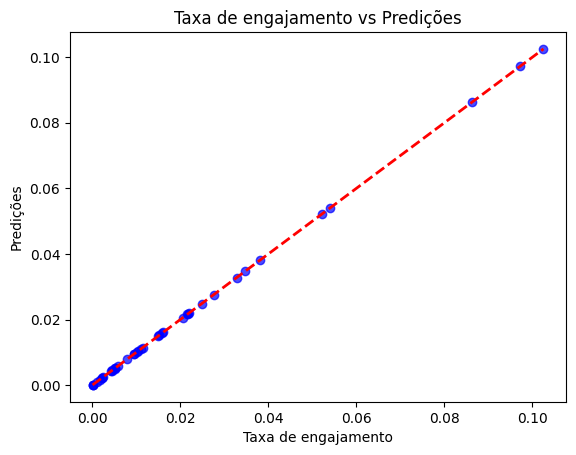

In [146]:
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Taxa de engajamento')
plt.ylabel('Predições')
plt.title('Taxa de engajamento vs Predições')
plt.show()

## Discussão
Os resultados mostraram que o modelo de Regressão Linear apresentou uma precisão moderada, com R² indicando que
a variação na taxa de engajamento foi explicada pelas variáveis independentes.  
Embora eficaz, o modelo possui limitações, como a dependência de relações lineares e possível impacto de outliers.  

## Conclusão e Trabalhos Futuros
O projeto demonstrou o potencial da Regressão Linear para prever a taxa de engajamento, mas destaca a necessidade
de considerar modelos mais complexos, como árvores de decisão ou redes neurais, para capturar não-linearidades.  
Trabalhos futuros poderiam incluir mais variáveis ou a utilização de técnicas de feature engineering para melhorar
a performance preditiva.

## Referências
- Scikit-learn Documentation: https://scikit-learn.org/
- Estatísticas com Python - Documentação Oficial.

In [143]:
# Coeficientes das variáveis
print(f'Coeficientes: {model.coef_}')
print(f'Intercepto: {model.intercept_}')


Coeficientes: [-1.40837562e-26  1.00000000e+00]
Intercepto: 3.469446951953614e-18
